# Gate Color Filtering

In [5]:
import cv2
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

%matplotlib inline

In [6]:
kernel = np.ones((5,5), np.uint8)

def color_filter(image, lower_upper_list): # 2nd param now takes a list to handle python3
    lower = np.array(lower_upper_list[0], dtype="uint8")
    upper = np.array(lower_upper_list[1], dtype="uint8")
    
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask = mask)
    
    return output, mask


In [9]:
#img_folder = "../images/transdec/transdec_pool_"
img_folder = "../images/transdec/transdec_gate_"

#img_base_name = "2_94"
#img_base_name = "2_149"
#img_base_name = "2_150"
img_base_name = "9_108"

img_path = img_folder + img_base_name + ".jpg"

img = cv2.imread(img_path)

img.shape

(480, 744, 3)

OpenCV native format - BGR


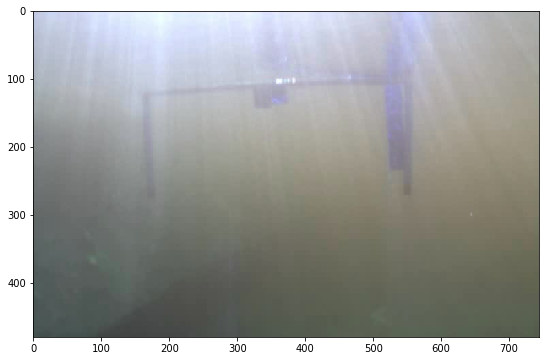

RGB


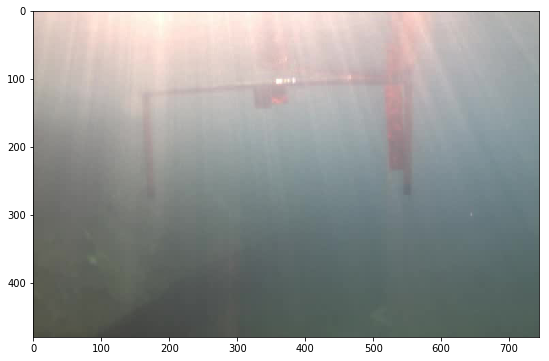

HSV


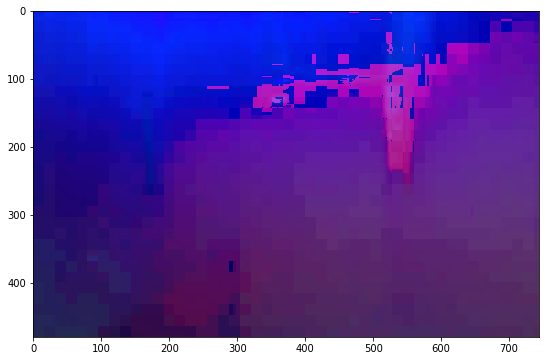

In [10]:
print("OpenCV native format - BGR")
plt.figure(figsize=(10, 6) )
plt.imshow(img)
plt.show()

print("RGB")
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )
plt.show()

print("HSV")
plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2HSV) )
plt.show()

# color thresh
---

In [427]:
## RGB TEST VALUES

#lower_thresh = np.array([110, 50, 50])
#upper_thresh = np.array([200, 200, 200])

# RGB for me
#lower_thresh = np.array([0, 100, 0])
#upper_thresh = np.array([200, 200, 140])

# close up
#lower_thresh = np.array([210, 150, 130])
#upper_thresh = np.array([255, 255, 255])

# far
#lower_thresh = np.array([190, 140, 140])
#upper_thresh = np.array([255, 250, 255])

# right
#lower_thresh = np.array([195, 150, 140])
#upper_thresh = np.array([255, 250, 255])

lower_thresh = np.array([0, 0, 120])
upper_thresh = np.array([255, 255, 200])

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [428]:
## HSV TEST VALUES

#lower_thresh = np.array([0, 0, 120])
#upper_thresh = np.array([255, 255, 200]) # [50 - 70, , ]

#lower_thresh = np.array([0, 0, 120])
#upper_thresh = np.array([255, 255, 200]) # [50 - 70, , ]

#lower_thresh = np.array([0, 40, 10])
#upper_thresh = np.array([10, 200, 255])

#lower_thresh = np.array([0, 0, 200]) # good 
#upper_thresh = np.array([70, 255, 255]) # good

# lower_thresh = np.array([0, 50, 100])
# upper_thresh = np.array([15, 100, 255])
#lower_thresh = np.array([0, 40, 100])
#pper_thresh = np.array([15, 100, 255])

#lower_thresh = np.array([0, 10, 10])
#upper_thresh = np.array([255, 250, 250])

#img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [429]:
#img_color_filt, mask = color_filter(img_hsv, [lower_thresh, upper_thresh] )
img_color_filt, mask = color_filter(img_rgb, [lower_thresh, upper_thresh] )

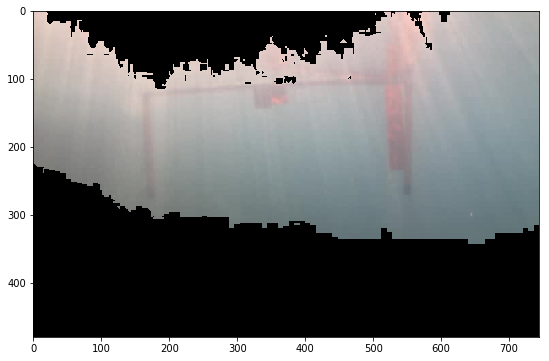

In [430]:
plt.figure(figsize=(10, 6) )
plt.imshow(img_color_filt) # original color space 
plt.show()

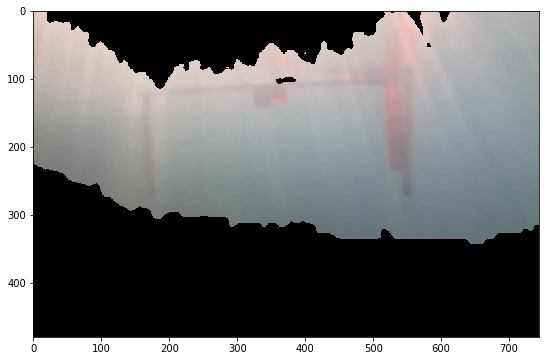

In [441]:
blur_med = cv2.medianBlur(img_color_filt, 9)

plt.figure(figsize=(10, 6) )
plt.imshow(blur_med) # original color space 
plt.show()

In [470]:
## HSV TEST VALUES

#lower_thresh_2 = np.array([50, 0, 10])
#upper_thresh_2 = np.array([255, 255, 255])

lower_thresh_2 = np.array([0, 10, 0])
upper_thresh_2 = np.array([240, 200, 200])

#img_hsv_2 = cv2.cvtColor(img_color_filt, cv2.COLOR_RGB2HSV)
img_hsv_2 = cv2.cvtColor(blur_med, cv2.COLOR_RGB2HSV)
#img_bgr_2 = cv2.cvtColor(img_color_filt, cv2.COLOR_HSV2RGB)

In [471]:
img_color_filt_2, mask = color_filter(img_hsv_2, [lower_thresh_2, upper_thresh_2] )
#img_color_filt_2, mask = color_filter(img_bgr_2, [lower_thresh_2, upper_thresh_2] )

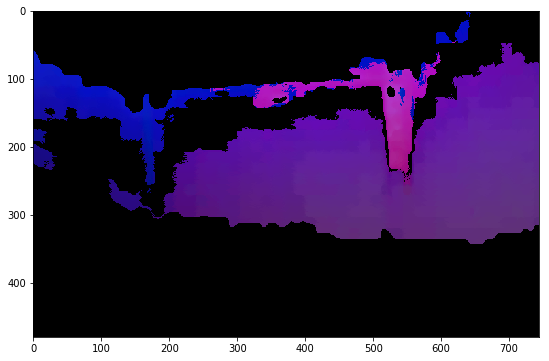

In [472]:
plt.figure(figsize=(10, 6) )
plt.imshow(img_color_filt_2) # original color space 
plt.show()

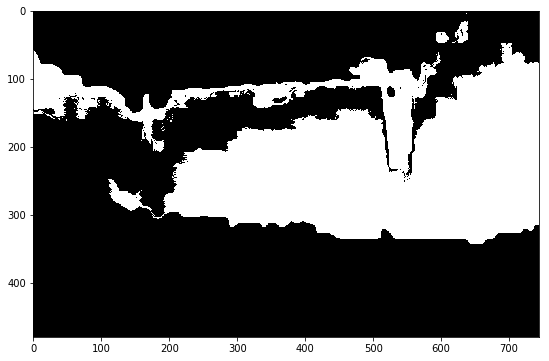

In [452]:
img_gray = cv2.cvtColor(img_color_filt_2, cv2.COLOR_RGB2GRAY)

ret, img_thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#img_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)
#img_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 3)

plt.figure(figsize=(10, 6) )
plt.imshow(img_thresh, cmap="gray")
plt.show()

247


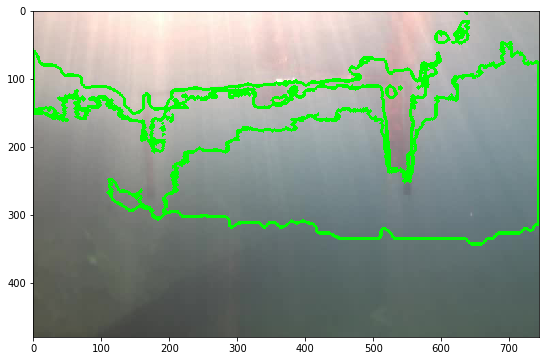

In [454]:
img_c, img_contours, img_heirarchy = cv2.findContours(img_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

threshold_color = [0, 255, 0] # green

img_copy = img.copy()
print(len(img_contours))
#print(len(filt_cont) )

cv2.drawContours(img_copy, img_contours, -1, threshold_color, 3)
#cv2.drawContours(img_copy, img_contours, 2, threshold_color, 3) # 5

plt.figure(figsize=(10, 6) )
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB) )
plt.show()

### Aspect Ratio


It is the ratio of width to height of bounding rect of the object.

In [107]:
# 2, 5
counter = 0
for i in img_contours:
    x, y, w, h = cv2.boundingRect(i)
    aspect_ratio = float(w) / h
    print("Contour #", counter, "\tASPECT RATIO:", aspect_ratio)
    counter += 1

Contour # 0 	ASPECT RATIO: 3.0
Contour # 1 	ASPECT RATIO: 1.1730769230769231
Contour # 2 	ASPECT RATIO: 1.0
Contour # 3 	ASPECT RATIO: 0.8
Contour # 4 	ASPECT RATIO: 1.25
Contour # 5 	ASPECT RATIO: 0.8823529411764706
Contour # 6 	ASPECT RATIO: 1.1428571428571428
Contour # 7 	ASPECT RATIO: 0.6666666666666666
Contour # 8 	ASPECT RATIO: 1.6363636363636365
Contour # 9 	ASPECT RATIO: 0.6
Contour # 10 	ASPECT RATIO: 1.0
Contour # 11 	ASPECT RATIO: 1.5714285714285714
Contour # 12 	ASPECT RATIO: 0.2222222222222222
Contour # 13 	ASPECT RATIO: 0.1875
Contour # 14 	ASPECT RATIO: 0.8333333333333334
Contour # 15 	ASPECT RATIO: 1.4444444444444444
Contour # 16 	ASPECT RATIO: 0.31543624161073824
Contour # 17 	ASPECT RATIO: 1.1666666666666667
Contour # 18 	ASPECT RATIO: 1.875
Contour # 19 	ASPECT RATIO: 1.0666666666666667
Contour # 20 	ASPECT RATIO: 0.75
Contour # 21 	ASPECT RATIO: 1.6
Contour # 22 	ASPECT RATIO: 2.0555555555555554
Contour # 23 	ASPECT RATIO: 1.2753623188405796
Contour # 24 	ASPECT RAT

### Extent

Extent is the ratio of contour area to bounding rectangle area.

In [50]:
# 2, 5
counter = 0
for i in img_contours:
    area = cv2.contourArea(i)    
    x, y, w, h = cv2.boundingRect(i)
    rect_area = w * h
    extent = float(area) / rect_area
    print("Contour #", counter, "\tAREA:", rect_area, "\tEXTENT:", extent)
    counter += 1

Contour # 0 	AREA: 957 	EXTENT: 0.5094043887147336
Contour # 1 	AREA: 70 	EXTENT: 0.7071428571428572
Contour # 2 	AREA: 4410 	EXTENT: 0.44603174603174606
Contour # 3 	AREA: 66 	EXTENT: 0.7272727272727273
Contour # 4 	AREA: 210 	EXTENT: 0.6595238095238095
Contour # 5 	AREA: 5075 	EXTENT: 0.5563546798029556
Contour # 6 	AREA: 104 	EXTENT: 0.6394230769230769
Contour # 7 	AREA: 1176 	EXTENT: 0.6135204081632653


### Solidity

Solidity is the ratio of contour area to its convex hull area.

In [49]:
# 2, 5
counter = 0
for i in img_contours:
    area = cv2.contourArea(i)
    hull = cv2.convexHull(i)
    hull_area = cv2.contourArea(hull)
    solidity = float(area) / hull_area
    print("Contour #", counter, "\tAREA:", area, "\tHULL AREA:", hull_area, "\tSOLIDITY:", solidity)
    counter += 1

Contour # 0 	AREA: 487.5 	HULL AREA: 542.5 	SOLIDITY: 0.8986175115207373
Contour # 1 	AREA: 49.5 	HULL AREA: 51.0 	SOLIDITY: 0.9705882352941176
Contour # 2 	AREA: 1967.0 	HULL AREA: 2451.5 	SOLIDITY: 0.802365898429533
Contour # 3 	AREA: 48.0 	HULL AREA: 48.5 	SOLIDITY: 0.9896907216494846
Contour # 4 	AREA: 138.5 	HULL AREA: 152.5 	SOLIDITY: 0.9081967213114754
Contour # 5 	AREA: 2823.5 	HULL AREA: 3351.0 	SOLIDITY: 0.8425843031930766
Contour # 6 	AREA: 66.5 	HULL AREA: 71.0 	SOLIDITY: 0.9366197183098591
Contour # 7 	AREA: 721.5 	HULL AREA: 805.5 	SOLIDITY: 0.8957169459962756


### Equivalent Diameter


Equivalent Diameter is the diameter of the circle whose area is same as the contour area.

In [52]:
# 2, 5
counter = 0
for i in img_contours:
    area = cv2.contourArea(i)
    equivalent_diameter = np.sqrt(4 * area / np.pi)
    print("Contour #", counter, "\tAREA:", area, "\tEQUIVALENT DIAMETER:", equivalent_diameter)
    counter += 1

Contour # 0 	AREA: 487.5 	EQUIVALENT DIAMETER: 24.913937425834398
Contour # 1 	AREA: 49.5 	EQUIVALENT DIAMETER: 7.938851142601841
Contour # 2 	AREA: 1967.0 	EQUIVALENT DIAMETER: 50.04460195159979
Contour # 3 	AREA: 48.0 	EQUIVALENT DIAMETER: 7.817640190446719
Contour # 4 	AREA: 138.5 	EQUIVALENT DIAMETER: 13.279445656570912
Contour # 5 	AREA: 2823.5 	EQUIVALENT DIAMETER: 59.95825092979057
Contour # 6 	AREA: 66.5 	EQUIVALENT DIAMETER: 9.201653640780462
Contour # 7 	AREA: 721.5 	EQUIVALENT DIAMETER: 30.309113011211988


### Orientation


Orientation is the angle at which object is directed. Following method also gives the Major Axis and Minor Axis lengths.

In [57]:
# 2, 5
counter = 0
for i in img_contours:
    (x, y), (maj_ax, min_ax), angle = cv2.fitEllipse(i)
    print(
        "Contour #", counter, "\t(X, Y)):", (x, y),
        "\n\t\tMAJOR AXIS, MINOR AXIS:", (maj_ax, min_ax),
        "\n\t\tANGLE:", angle, "\n"
    )
    counter += 1

Contour # 0 	(X, Y)): (622.4812622070312, 474.947509765625) 
		MAJOR AXIS, MINOR AXIS: (16.895830154418945, 62.912086486816406) 
		ANGLE: 30.51280403137207 

Contour # 1 	(X, Y)): (664.7727661132812, 445.7372131347656) 
		MAJOR AXIS, MINOR AXIS: (6.700730800628662, 11.929997444152832) 
		ANGLE: 9.101499557495117 

Contour # 2 	(X, Y)): (589.742919921875, 153.24371337890625) 
		MAJOR AXIS, MINOR AXIS: (16.481260299682617, 317.02764892578125) 
		ANGLE: 5.743581295013428 

Contour # 3 	(X, Y)): (697.1358642578125, 151.6501922607422) 
		MAJOR AXIS, MINOR AXIS: (7.024287700653076, 12.071028709411621) 
		ANGLE: 80.14222717285156 

Contour # 4 	(X, Y)): (697.6296997070312, 136.5009307861328) 
		MAJOR AXIS, MINOR AXIS: (13.17183780670166, 17.636661529541016) 
		ANGLE: 29.651765823364258 

Contour # 5 	(X, Y)): (90.60418701171875, 200.9400634765625) 
		MAJOR AXIS, MINOR AXIS: (16.109600067138672, 278.44537353515625) 
		ANGLE: 2.524914264678955 

Contour # 6 	(X, Y)): (591.6392211914062, 47.5823

### Mask and Pixel Points

Contour # 2 	NUMBER OF PIXEL POINTS: 2126


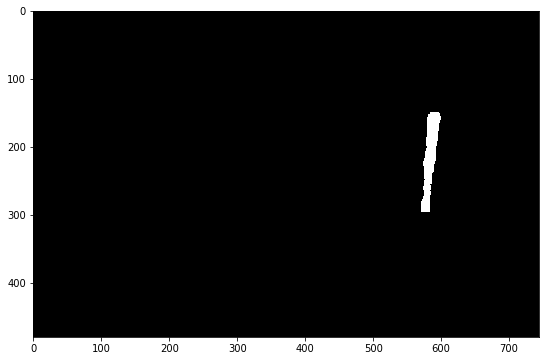

In [68]:
contour_num = 2

mask = np.zeros(img_gray.shape, np.uint8)
cv2.drawContours(mask, [img_contours[contour_num]], 0, 255, -1)
pixel_points = cv2.findNonZero(mask)
print("Contour #", contour_num, "\tNUMBER OF PIXEL POINTS:", len(pixel_points))

plt.figure(figsize=(10, 6) )
plt.imshow(mask, cmap="gray")
plt.show()

### Maximum Value, Minimun Value and their locations

We can find these parameters using a mask image.

In [80]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(img_gray, mask = mask)
print(
    "MIN VAL:", min_val,
    "\nMAX VAL:", max_val,
    "\nMIN LOCATION:", min_loc,
    "\nMAX LOCATION:", max_loc
)

MIN VAL: 166.0 
MAX VAL: 228.0 
MIN LOCATION: (575, 272) 
MAX LOCATION: (580, 221)


### Mean Color or Mean Intensity


Here, we can find the average color of an object. Or it can be average intensity of the object in grayscale mode. We again use the same mask to do it.

In [82]:
mean_val = cv2.mean(img, mask = mask)
print("MEAN COLOR/INTENSITY:\n", mean_val)

MEAN COLOR/INTENSITY:
 (162.41627469426152, 177.48965192850423, 240.63734713076198, 0.0)


### Extreme Points


Extreme Points means topmost, bottommost, rightmost and leftmost points of the object.

In [84]:
counter = 0
for i in img_contours:
    left_most = tuple(i[i[:,:,0].argmin()][0])
    right_most = tuple(i[i[:,:,0].argmax()][0])
    top_most = tuple(i[i[:,:,1].argmin()][0])
    bottom_most = tuple(i[i[:,:,1].argmax()][0])
    print(
        "CONTOUR #", counter,
        "\n\tLEFT MOST:", left_most,
        "\n\tRIGHT_MOST:", right_most,
        "\n\tTOP MOST:", top_most,
        "\n\tBOTTOM MOST:", bottom_most
    )
    counter += 1


CONTOUR # 0 
	LEFT MOST: (612, 476) 
	RIGHT_MOST: (640, 454) 
	TOP MOST: (634, 447) 
	BOTTOM MOST: (612, 479)
CONTOUR # 1 
	LEFT MOST: (662, 443) 
	RIGHT_MOST: (668, 447) 
	TOP MOST: (663, 441) 
	BOTTOM MOST: (662, 450)
CONTOUR # 2 
	LEFT MOST: (570, 281) 
	RIGHT_MOST: (599, 160) 
	TOP MOST: (584, 150) 
	BOTTOM MOST: (573, 296)
CONTOUR # 3 
	LEFT MOST: (692, 150) 
	RIGHT_MOST: (702, 153) 
	TOP MOST: (694, 149) 
	BOTTOM MOST: (692, 154)
CONTOUR # 4 
	LEFT MOST: (690, 134) 
	RIGHT_MOST: (704, 139) 
	TOP MOST: (698, 128) 
	BOTTOM MOST: (692, 141)
CONTOUR # 5 
	LEFT MOST: (79, 283) 
	RIGHT_MOST: (103, 118) 
	TOP MOST: (91, 98) 
	BOTTOM MOST: (84, 300)
CONTOUR # 6 
	LEFT MOST: (586, 44) 
	RIGHT_MOST: (598, 51) 
	TOP MOST: (586, 44) 
	BOTTOM MOST: (592, 51)
CONTOUR # 7 
	LEFT MOST: (579, 27) 
	RIGHT_MOST: (606, 11) 
	TOP MOST: (592, 0) 
	BOTTOM MOST: (587, 41)
